## Imports

In [49]:
from PIL import Image, ImageDraw, ImageFont
import os
import requests

## Load Image

In [50]:
source_dir = 'images-jpg'
source_file_name = 'car.jpg'

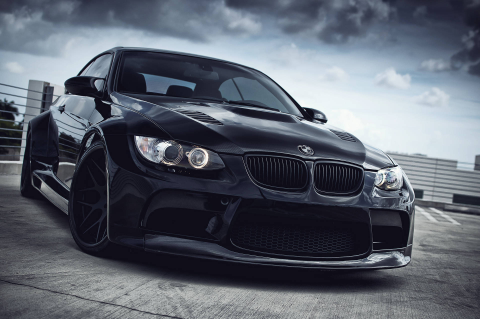

In [51]:
with Image.open(f'{source_dir}/{source_file_name}') as image:
    display(image.reduce(4))

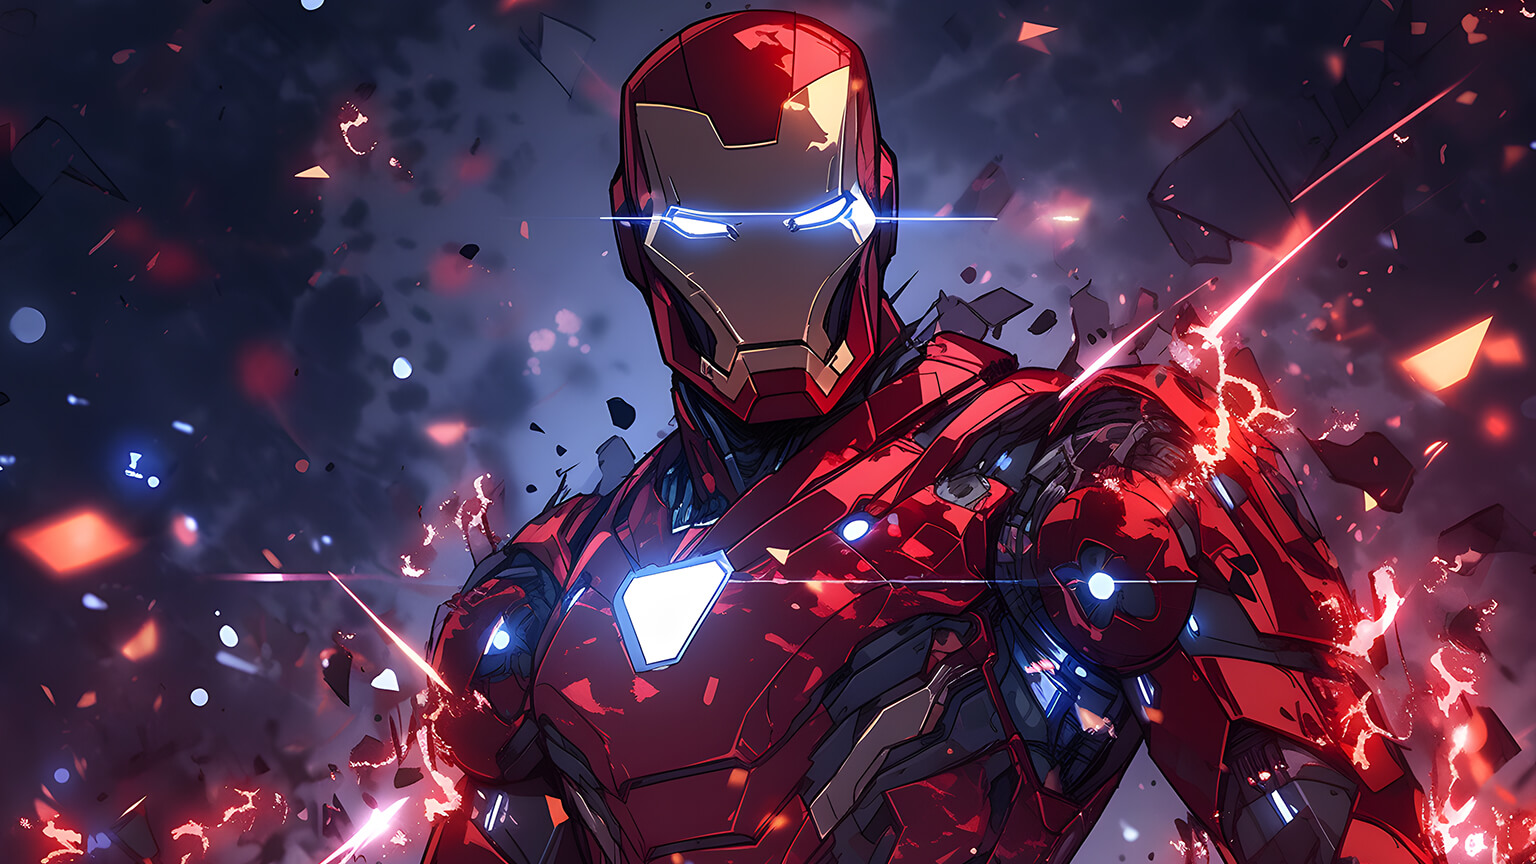

In [52]:
# image_file_url = 'https://wallpapers-clan.com/wp-content/uploads/2023/11/marvel-iron-man-in-destroyed-suit-desktop-wallpaper-preview.jpg'
# image_file = requests.get(image_file_url, stream=True).raw
# image = Image.open(image_file)
# image

In [53]:
image = image.resize((1920, 1275))

In [54]:
image.size

(1920, 1275)

## Image2Ascii

In [55]:
#Function to return ascii character based on the pixel value
def get_ascii_char(px_val, fill_vals=''):
    PIXEL_FILL_CHARS_SORTED_INC = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\\|()1\{\}[]?-_+~<>i!lI;:,\"^`'. "[::-1]
    if not fill_vals:
        fill_vals = PIXEL_FILL_CHARS_SORTED_INC
    ind = int((px_val / 256) * len(fill_vals))
    ascii_char = fill_vals[ind]
    return ascii_char

# simple_fill_vals = '_-oQM#'

In [56]:
CHAR_WIDTH, CHAR_HEIGHT = 10, 18 #based on observed font's letter width and height
CHAR_ASPECT_RATIO = CHAR_WIDTH / CHAR_HEIGHT

In [57]:
scale_factor = 0.09

image = image.resize(
    (int(image.width * scale_factor), int(image.height * scale_factor * CHAR_ASPECT_RATIO))
)
img_width, img_height = image.size
image.size

(172, 63)

### Image2AsciiText

In [58]:
OUTPUT_FILE_PATH = 'output-ascii-text'
output_filename = f'{os.path.splitext(source_file_name)[0]}.txt'

output_file = open(f'{OUTPUT_FILE_PATH}/{output_filename}', 'w')

In [59]:
px = image.load()

for h in range(img_height):
    for w in range(img_width):
        r, g, b = px[w, h]
        ascii_char = get_ascii_char(int(sum((r, g, b))/3))
        output_file.write(ascii_char)
    output_file.write('\n')

### Image2AsciiImage

In [60]:
OUTPUT_IMAGE_PATH = 'output-ascii-png'
output_image_filename = f'{OUTPUT_IMAGE_PATH}/{os.path.splitext(source_file_name)[0]}.png'
output_image = Image.new('RGB', (CHAR_WIDTH * img_width, CHAR_HEIGHT * img_height), color=(0, 0, 0))
output_image_draw = ImageDraw.Draw(output_image)

font = ImageFont.truetype('fonts/lucon.ttf', 15)

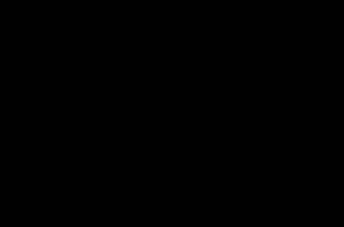

In [61]:
output_image.reduce(5)

In [62]:
output_image.size

(1720, 1134)

In [63]:
px = image.load()

for h in range(img_height):
    for w in range(img_width):
        r, g, b = px[w, h]
        ascii_char = get_ascii_char(int(sum((r, g, b))/3))
        output_image_draw.text((w*CHAR_WIDTH, h*CHAR_HEIGHT), ascii_char, font=font, fill=(r, g, b))

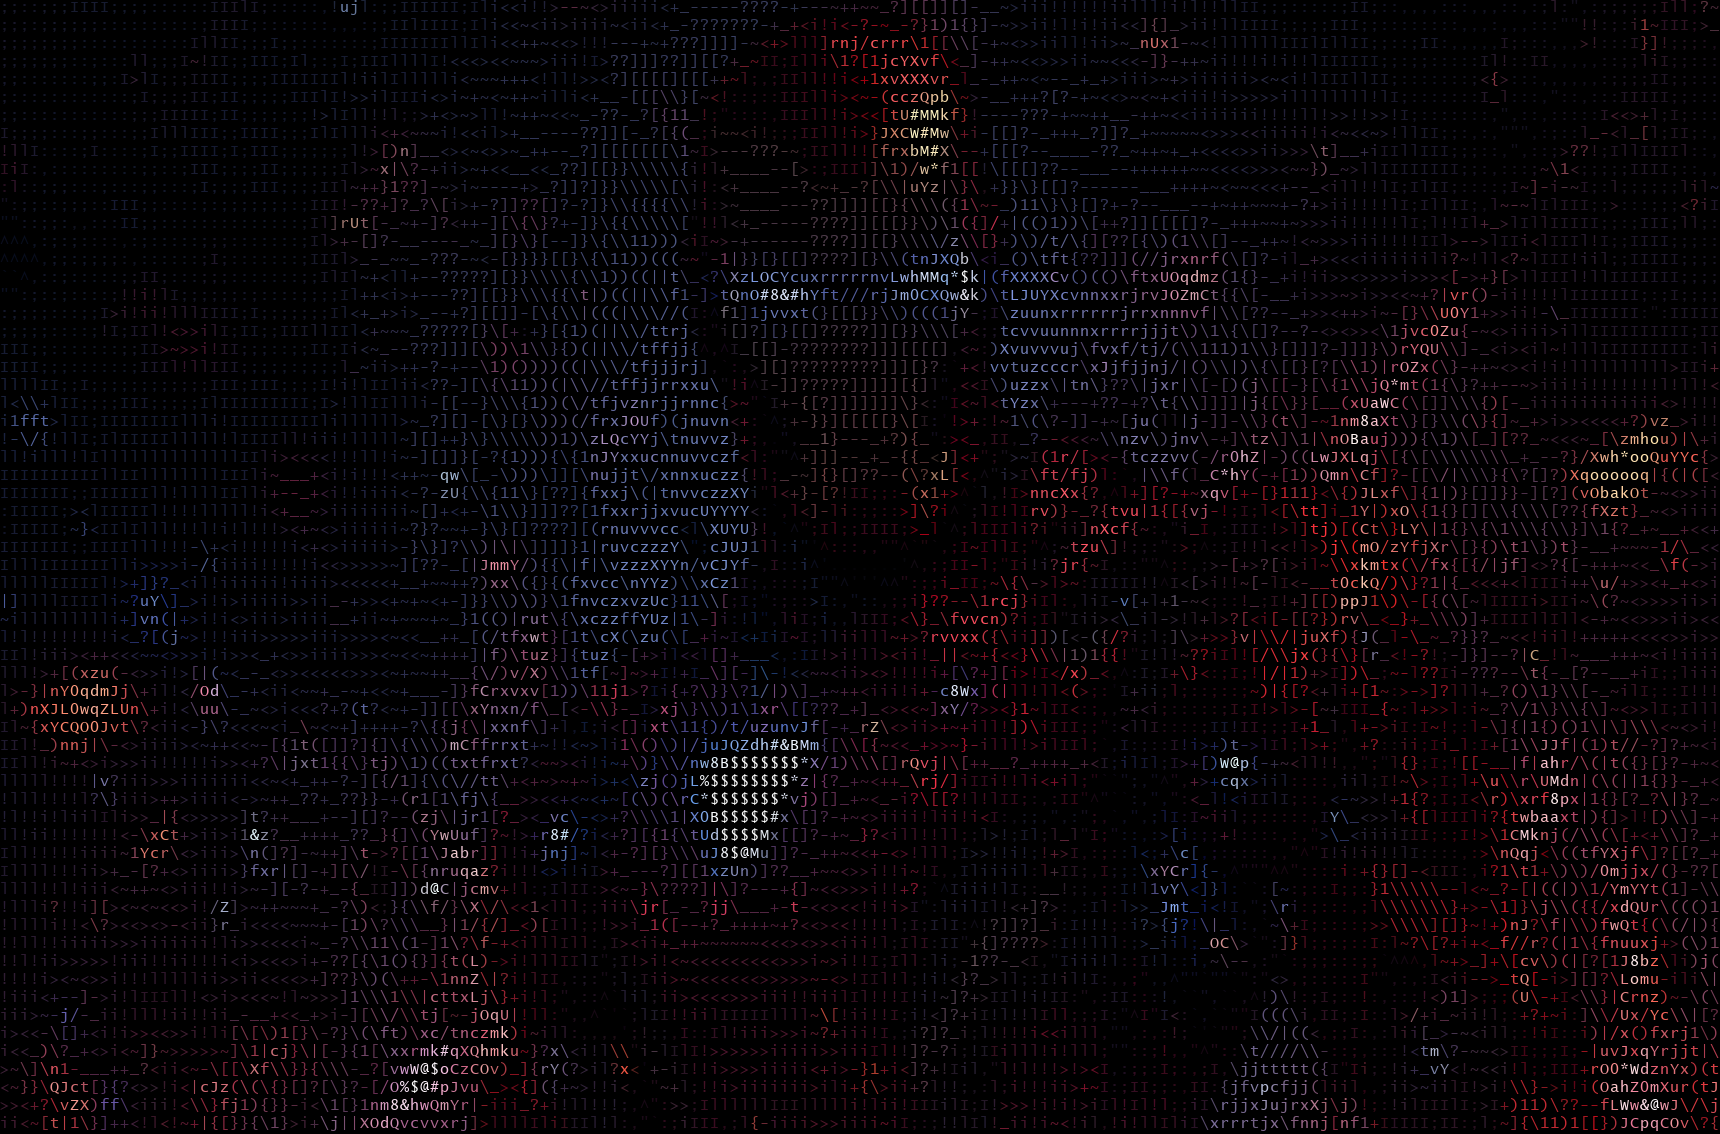

In [64]:
output_image

In [65]:
output_image.save(output_image_filename)